In [ ]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv('Output/System 1/Sim 1.csv', header=0)
data

,m,n,o,num_images,pos_rms,mag_rms,chi2,$\sigma$,x,y,e,$θ_{e}$,$r_{core}$,NaN,source_x,source_y
0,110.0,0.0,0.00000,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,0.00000,0.0,0.0,20.82053,20.98469
1,110.0,0.0,3.63636,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,3.63636,0.0,0.0,20.82053,20.98469
2,110.0,0.0,7.27273,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,7.27273,0.0,0.0,20.82053,20.98469
3,110.0,0.0,10.90909,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,10.90909,0.0,0.0,20.82053,20.98469
4,110.0,0.0,18.18182,2,0.485071,468.650950,250399.6,110.0,20.82054,20.98519,0.0,18.18182,0.0,0.0,20.82053,20.98469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,150.0,0.9,323.63636,4,0.457810,3.986467,275791.6,150.0,20.78045,21.20938,0.9,323.63640,0.0,0.0,20.79957,21.01188
999996,150.0,0.9,349.09091,3,0.660883,3.996800,281760.8,150.0,20.79847,20.69036,0.9,349.09090,0.0,0.0,20.93481,20.95359
999997,150.0,0.9,356.36364,4,0.846590,4.035950,168310.3,150.0,20.81373,21.00115,0.9,356.36360,0.0,0.0,20.82708,21.00422
999998,150.0,0.9,360.00000,4,0.420982,4.033950,173802.4,150.0,20.81051,21.01098,0.9,360.00000,0.0,0.0,20.83269,21.00598


In [3]:
data['$\\sigma$'].unique()

array([110.    , 110.404 , 110.8081, 111.2121, 111.6162, 112.0202,
       112.4242, 112.8283, 113.2323, 113.6364, 114.0404, 114.4444,
       114.8485, 115.2525, 115.6566, 116.0606, 116.4647, 116.8687,
       117.2727, 117.6768, 118.0808, 118.4848, 118.8889, 119.2929,
       119.697 , 120.101 , 120.505 , 120.9091, 121.3131, 121.7172,
       122.1212, 122.5252, 122.9293, 123.3333, 123.7374, 124.1414,
       124.5455, 124.9495, 125.3535, 125.7576, 126.1616, 126.5657,
       126.9697, 127.3737, 127.7778, 128.1818, 128.5859, 128.9899,
       129.3939, 129.798 , 130.202 , 130.6061, 131.0101, 131.4141,
       131.8182, 132.2222, 132.6263, 133.0303, 133.4343, 133.8384,
       134.2424, 134.6465, 135.0505, 135.4546, 135.8586, 136.2626,
       136.6667, 137.0707, 137.4748, 137.8788, 138.2828, 138.6869,
       139.0909, 139.4949, 139.899 , 140.303 , 140.7071, 141.1111,
       141.5152, 141.9192, 142.3232, 142.7273, 143.1313, 143.5353,
       143.9394, 144.3434, 144.7475, 145.1515, 145.5556, 145.9

In [23]:
mask_data = data[data['$\\sigma$'] == 149.596]


Step 2: Extracting data from DataFrame for interpolation...
Extracted 10000 points.

Step 3: Creating an interpolation function from the data...
Interpolator function created successfully.

Step 4: Running Nelder-Mead optimizer on the interpolated surface...
Iteration 1: f_min = 4.453561e+04, rtol = 8.262886e-01
Iteration 2: f_min = 2.802946e+04, rtol = 1.109925e+00
Iteration 3: f_min = 2.802946e+04, rtol = 4.549339e-01
Iteration 4: f_min = 2.802946e+04, rtol = 3.868889e-01
Iteration 5: f_min = 2.802946e+04, rtol = 1.588893e-01
Iteration 6: f_min = 2.204444e+04, rtol = 3.576845e-01
Iteration 7: f_min = 2.201810e+04, rtol = 2.402256e-01
Iteration 8: f_min = 1.388778e+04, rtol = 4.540027e-01
Iteration 9: f_min = 1.388778e+04, rtol = 4.528687e-01
Iteration 10: f_min = 9.240985e+03, rtol = 6.558609e-01
Iteration 11: f_min = 9.240985e+03, rtol = 4.018195e-01
Iteration 12: f_min = 9.240985e+03, rtol = 2.056047e-01
Iteration 13: f_min = 9.240985e+03, rtol = 9.420675e-02
Iteration 14: f_min =

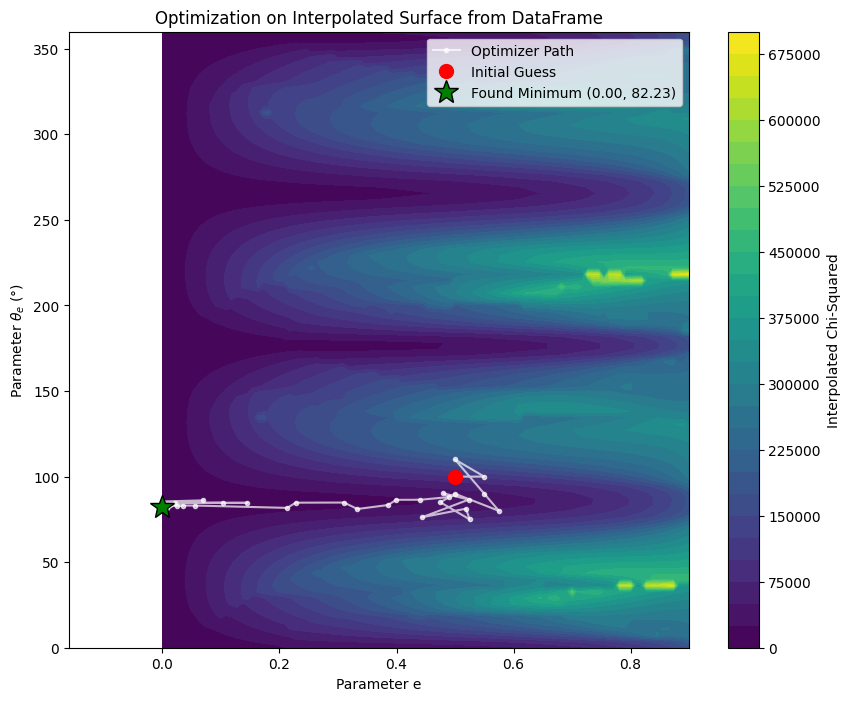

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# (Paste your nelder_mead_glafic_with_history function here)
# This function does not need any changes.
def nelder_mead_glafic_with_history(func, x0, y0, ftol=1e-4, nmax=10000, verbose=False):
    """
    Nelder-Mead simplex optimization matching glafic's implementation,
    with tracking of all evaluation points.
    ... (full code from your prompt) ...
    """
    # Simplex coefficients from glafic
    ALPHA = 1.0  # reflection coefficient
    BETA = 0.5   # contraction coefficient
    GAMMA = 2.0  # expansion coefficient

    n = 2  # number of dimensions

    # Initialize simplex: 3 vertices for 2D problem
    v = np.zeros((n + 1, n))
    f = np.zeros(n + 1)

    # Track all evaluations
    eval_history = []

    # Set initial simplex
    v[0] = [x0, y0]
    dx = 0.1 * abs(x0) if x0 != 0 else 0.1
    dy = 0.1 * abs(y0) if y0 != 0 else 0.1
    v[1] = [x0 + dx, y0]
    v[2] = [x0, y0 + dy]

    # Evaluate function at initial vertices and record
    for i in range(n + 1):
        f[i] = func(v[i][0], v[i][1])
        eval_history.append((v[i][0], v[i][1], f[i]))

    # Main optimization loop
    for itr in range(1, nmax + 1):
        # Handle cases where points are outside interpolation bounds (returning inf)
        f_finite_indices = np.where(np.isfinite(f))[0]
        if len(f_finite_indices) < 3:
            # Not enough valid points to form a simplex, try to shrink
            vs = np.argmin(f) # find the best point we have
            for i in range(n + 1):
                if i != vs:
                    v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                    f[i] = func(v[i][0], v[i][1])
                    eval_history.append((v[i][0], v[i][1], f[i]))
            continue

        # Find indices of best, worst, and second-worst vertices among finite values
        f_temp_finite = f[f_finite_indices]
        vg_idx_finite = np.argmax(f_temp_finite)
        vs_idx_finite = np.argmin(f_temp_finite)
        
        vg = f_finite_indices[vg_idx_finite] # Index in the original f array
        vs = f_finite_indices[vs_idx_finite] # Index in the original f array

        f_temp = f.copy()
        f_temp[vg] = -np.inf
        vh = np.argmax(f_temp)

        # Calculate centroid of all points except worst
        vm = np.mean(v[[i for i in range(n + 1) if i != vg]], axis=0)

        # Reflection
        vr = vm + ALPHA * (vm - v[vg])
        fr = func(vr[0], vr[1])
        eval_history.append((vr[0], vr[1], fr))

        if np.isnan(fr): fr = np.inf

        if f[vs] <= fr < f[vh]:
            # Accept reflection
            v[vg], f[vg] = vr, fr
        elif fr < f[vs]:
            # Try expansion
            ve = vm + GAMMA * (vr - vm)
            fe = func(ve[0], ve[1])
            eval_history.append((ve[0], ve[1], fe))
            if np.isnan(fe): fe = np.inf
            
            if fe < fr:
                v[vg], f[vg] = ve, fe
            else:
                v[vg], f[vg] = vr, fr
        else:
            # Contraction
            if fr < f[vg]:
                vc = vm + BETA * (vr - vm) # Outside
            else:
                vc = vm - BETA * (vm - v[vg]) # Inside
            
            fc = func(vc[0], vc[1])
            eval_history.append((vc[0], vc[1], fc))
            if np.isnan(fc): fc = np.inf

            if fc < f[vg]:
                v[vg], f[vg] = vc, fc
            else:
                # Shrink toward best vertex
                for i in range(n + 1):
                    if i != vs:
                        v[i] = v[vs] + (v[i] - v[vs]) / 2.0
                        f[i] = func(v[i][0], v[i][1])
                        eval_history.append((v[i][0], v[i][1], f[i]))
        
        # Check convergence
        f_finite = f[np.isfinite(f)]
        if len(f_finite) < 2: continue
        max_f, min_f = np.max(f_finite), np.min(f_finite)
        
        rtol = 2.0 * abs(max_f - min_f) / (abs(max_f) + abs(min_f)) if (abs(max_f) + abs(min_f)) > 0 else 0.0
          
        if verbose:
            print(f"Iteration {itr}: f_min = {min_f:.6e}, rtol = {rtol:.6e}")
          
        if rtol < ftol:
            break
      
    vs = np.argmin(f)
    return v[vs][0], v[vs][1], f[vs], eval_history


# --- Main Application ---

# 1. LOAD YOUR DATA
# For demonstration, we create a sample DataFrame.
# !!! IN YOUR CODE, REPLACE THIS BLOCK WITH:
# !!! data = pd.read_csv('your_file.csv')


# 2. PREPARE DATA FOR INTERPOLATION
print("\nStep 2: Extracting data from DataFrame for interpolation...")
# Extract the parameter columns as a (N, 2) numpy array of points.
# It is crucial that the order of columns here ('e', '$θ_{e}$') matches
# the order of arguments (x, y) in the function the optimizer calls.
points = mask_data[['e', '$θ_{e}$']].values

# Extract the chi2 column as a (N,) numpy array of values.
values = mask_data['chi2'].values
print(f"Extracted {len(values)} points.")


# 3. CREATE THE INTERPOLATION FUNCTION
print("\nStep 3: Creating an interpolation function from the data...")
def create_interpolated_chi2_func(points, values):
    """Creates a callable function that interpolates chi2 values."""
    def chi2_interpolator(e, theta_e):
        # Use griddata to estimate chi2 at any (e, theta_e) point
        # 'linear' is fast and robust.
        # fill_value=np.inf is CRITICAL to penalize the optimizer for leaving the data region.
        chi2 = griddata(points, values, (e, theta_e), method='linear', fill_value=np.inf)
        return chi2
    return chi2_interpolator

interpolated_chi2 = create_interpolated_chi2_func(points, values)
print("Interpolator function created successfully.")


# 4. RUN THE OPTIMIZER
print("\nStep 4: Running Nelder-Mead optimizer on the interpolated surface...")
# It's good practice to start the search from a point within your data range
initial_e = 0.5
initial_theta_e = 100.0

e_min, theta_e_min, chi2_min, history = nelder_mead_glafic_with_history(
    interpolated_chi2,
    initial_e,
    initial_theta_e,
    verbose=True
)


# 5. PRINT RESULTS
print("\n--- Optimization Finished ---")
print(f"Initial Guess: (e={initial_e}, θe={initial_theta_e})")
print(f"Found Minimum Chi-squared (interpolated): {chi2_min:.6f}")
print(f"At Parameters: (e={e_min:.4f}, θe={theta_e_min:.4f})")
print(f"Total Interpolator Evaluations: {len(history)}")


# 6. VISUALIZE THE RESULT
print("\nStep 5: Visualizing the results...")
plt.figure(figsize=(10, 8))

# Create a grid for a smooth contour plot
e_grid = np.linspace(data['e'].min(), data['e'].max(), 100)
theta_e_grid = np.linspace(data['$θ_{e}$'].min(), data['$θ_{e}$'].max(), 100)
E_grid, THETA_grid = np.meshgrid(e_grid, theta_e_grid)

# Interpolate the chi2 values onto this grid for plotting
CHI2_grid = griddata(points, values, (E_grid, THETA_grid), method='cubic')

# Plot the contour
contour = plt.contourf(E_grid, THETA_grid, CHI2_grid, levels=30, cmap='viridis')
plt.colorbar(contour, label='Interpolated Chi-Squared')

# Overlay the path of the optimizer
hist_e = [p[0] for p in history]
hist_theta_e = [p[1] for p in history]
plt.plot(hist_e, hist_theta_e, 'w-o', markersize=3, alpha=0.7, label='Optimizer Path')

# Plot key points
plt.plot(initial_e, initial_theta_e, 'ro', markersize=10, label='Initial Guess')
plt.plot(e_min, theta_e_min, 'g*', markersize=18, markeredgecolor='k', label=f'Found Minimum ({e_min:.2f}, {theta_e_min:.2f})')

plt.xlabel('Parameter e')
# You can use LaTeX formatting in plot labels
plt.ylabel('Parameter $θ_{e}$ (°)')
plt.title('Optimization on Interpolated Surface from DataFrame')
plt.legend()
plt.show()

[(0.5, 100.0, 97934.97135887886),
 (0.55, 100.0, 107241.43799839399),
 (0.5, 110.0, 183837.5),
 (0.55, 90.0, array(44535.6125)),
 (0.5750000000000001, 80.0, array(53283.17755776)),
 (0.5, 90.0, array(38824.295)),
 (0.475, 85.0, array(28029.45827044)),
 (0.5249999999999999, 75.0, array(77243.78147638)),
 (0.5187499999999999, 81.25, array(41474.642535)),
 (0.44374999999999987, 76.25, array(59034.30054035)),
 (0.5234375, 86.5625, array(32867.38759896)),
 (0.47968750000000004, 90.3125, array(37796.2060826)),
 (0.48945312500000004, 88.046875, array(31646.68537295)),
 (0.441015625, 86.484375, array(25024.2907878)),
 (0.39980468750000003, 86.4453125, array(22044.4422339)),
 (0.3853515624999999, 83.3984375, array(22018.10474047)),
 (0.33330078124999984, 81.07421875, array(26727.59392031)),
 (0.31015625, 84.84375, array(17102.50667657)),
 (0.22773437500000004, 84.765625, array(13887.77982274)),
 (0.21328124999999992, 81.71875, array(18259.1002837)),
 (0.055664062500000056, 83.0859375, array(924